**Bagging (Bootstrap Aggregating) ka Core Idea, Usage, Types aur Example**

### **Core Idea of Bagging**
Bagging ka basic concept yeh hai ke hum multiple versions of the same model banate hain aur unke predictions ko combine kar ke ek final, stronger prediction nikaalte hain. **Bagging** ka full form hai **Bootstrap Aggregating**, jo do techniques ko mila ke kaam karta hai:
1. **Bootstrap Sampling**: Random sampling with replacement ka use karke alag alag subsets of data banaye jate hain. Yeh har model ko different training data provide karta hai, jis se wo diverse ban jate hain.
2. **Aggregation**: In sub-models ke predictions ko average (regression problems) ya voting (classification problems) karke ek final prediction nikaalte hain.

Yeh technique overfitting aur variance ko reduce karne mein madadgar hoti hai, kyunki multiple models ke combination se result zyada stable aur reliable ban jata hai.

### **Where and When to Use Bagging**
Bagging tab useful hota hai jab:
- Aapke pass **high variance** wale models ho, jaise Decision Trees. High variance ka matlab hai ke model training data mein overfit kar sakta hai.
- **Classification aur regression problems** dono mein, jahan aapko stable aur accurate predictions chahiye ho.
- Jab aapko **ensemble approach** se accuracy improve karni ho aur aap overfitting ko reduce karna chahte ho.
  
Generally, bagging ko **decision trees** ke saath use kiya jata hai aur jab hum bagging specifically decision trees ke saath karte hain, to ise **Random Forest** kehte hain.

### **Types of Bagging**
1. **Standard Bagging**:
   - Multiple copies of the same model (jaise decision trees) banate hain aur har model ko different bootstrap sample pe train karte hain.
   - Final prediction ke liye classification mein voting aur regression mein averaging use ki jati hai.
  
2. **Pasting**:
   - Bagging ka ek variant hai jo **without replacement** sampling use karta hai, matlab har subset of data unique hota hai aur data reuse nahi hota.
   - Generally less common than standard bagging, lekin kuch cases mein helpful hota hai.

3. **Random Forest (Specialized Bagging)**:
   - Random Forest bagging ka hi ek extension hai jo decision trees ke saath use hota hai.
   - Isme feature selection bhi random hoti hai, matlab har decision tree different features pe train hota hai. Yeh model ko aur robust banata hai aur overfitting ka chance kam karta hai.

### **Example of Bagging with Decision Trees (Random Forest)**
Sochte hain ke aapke pass aik dataset hai jismein aapne predict karna hai ke aik student exam pass karega ya nahi (classification problem).

- Pehle aap bootstrap sampling use karke 5 alag alag subsets banate hain original dataset se.
- Phir aap har subset par ek decision tree model train karte hain.
- Har decision tree ko alag alag training data milta hai to wo thode different patterns seekhte hain.
- Jab aapke pass ek naya data point aata hai, to sab models apna prediction dete hain (pass ya fail).
- Aakhir mein majority vote (pass ya fail) ke through final prediction liya jata hai.



### **Benefits of Bagging**
- **Reduced Variance**: Bagging overfitting ko kam karta hai, especially high variance models ke liye jaise decision trees.
- **Better Stability**: Ensemble ka matlab hai ke individual model ki errors kam hoti hain aur final output zyada reliable hota hai.
- **Improved Accuracy**: Ensemble approach se predictions ki accuracy improve hoti hai.

### **When to Use Bagging**
- Jab model ka performance single model se inconsistent ho aur high variance ho.
- Jab aapko stable aur accurate predictions chahiye ho aur ensemble methods ki flexibility ho.
- Jab dataset bada ho aur aap bootstrap sampling se advantage lena chahein.

Bagging se multiple models ka combination create karke overall predictions ko improve kar sakte hain, aur is technique ne random forest jaise popular algorithms ke liye rasta banaya hai jo aaj bhi ML ke top techniques mein se ek hai.

In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [118]:
df = pd.read_csv('../Voting/IRIS.csv')

In [119]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
df = df.iloc[:,0:]

In [121]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
encoder = LabelEncoder()

In [124]:
df['species'] = encoder.fit_transform(df['species'])

In [125]:
df.sample(12)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,1
131,7.9,3.8,6.4,2.0,2
129,7.2,3.0,5.8,1.6,2
94,5.6,2.7,4.2,1.3,1
20,5.4,3.4,1.7,0.2,0
126,6.2,2.8,4.8,1.8,2
1,4.9,3.0,1.4,0.2,0
103,6.3,2.9,5.6,1.8,2
27,5.2,3.5,1.5,0.2,0
148,6.2,3.4,5.4,2.3,2


In [126]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [127]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [128]:
df.sample(3)

,sepal_width,petal_length,species
145,3.0,5.2,2
53,2.3,4.0,1
59,2.7,3.9,1


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

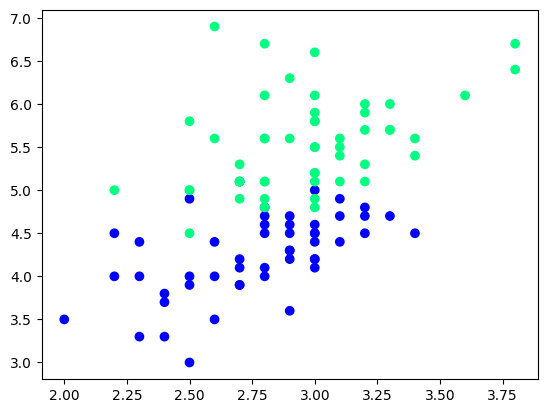

In [130]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [131]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
67,2.7,4.1,1
87,2.3,4.4,1
109,3.6,6.1,2
93,2.3,3.3,1
77,3.0,5.0,1
58,2.9,4.6,1
72,2.5,4.9,1
84,3.0,4.5,1
61,3.0,4.2,1
73,2.8,4.7,1


In [144]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [133]:
df_train

,sepal_width,petal_length,species
113,2.5,5.0,2
95,3.0,4.2,1
120,3.2,5.7,2
101,2.7,5.1,2
67,2.7,4.1,1
119,2.2,5.0,2
147,3.0,5.2,2
139,3.1,5.4,2
114,2.8,5.1,2
84,3.0,4.5,1


In [134]:
df_val

,sepal_width,petal_length,species
99,2.8,4.1,1
73,2.8,4.7,1
57,2.4,3.3,1
131,3.8,6.4,2
61,3.0,4.2,1


In [135]:
df_test

,sepal_width,petal_length,species
86,3.1,4.7,1
65,3.1,4.4,1
66,3.0,4.5,1
82,2.7,3.9,1
103,2.9,5.6,2


In [145]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [137]:
y_test

array([1, 1, 1, 2, 1])

# Case 1 - Bagging

In [146]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
122,2.8,6.7,2
122,2.8,6.7,2
113,2.5,5.0,2
100,3.3,6.0,2
51,3.2,4.5,1
61,3.0,4.2,1
61,3.0,4.2,1
61,3.0,4.2,1


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [147]:
dt_bag1 = DecisionTreeClassifier()

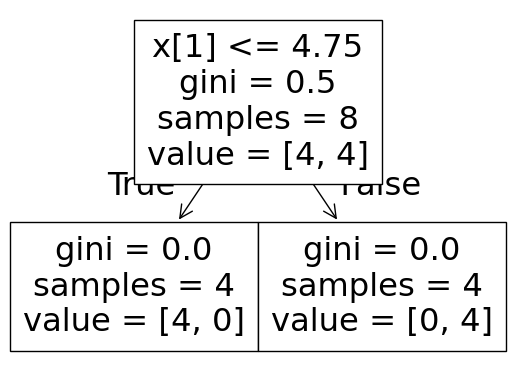

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


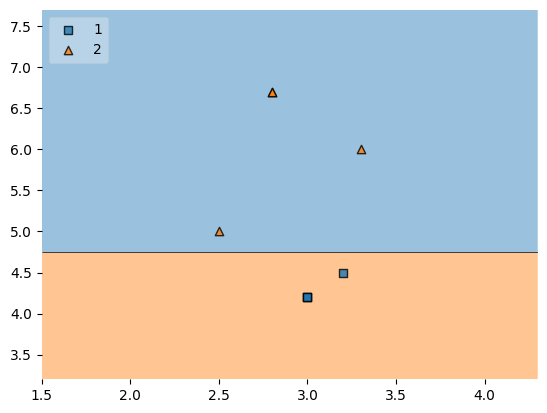

In [148]:
evaluate(dt_bag1,X,y)

In [151]:
# Data for Tree 1
df_bag = df_train.sample(6,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
51,3.2,4.5,1
100,3.3,6.0,2
122,2.8,6.7,2
111,2.7,5.3,2
149,3.0,5.1,2
72,2.5,4.9,1


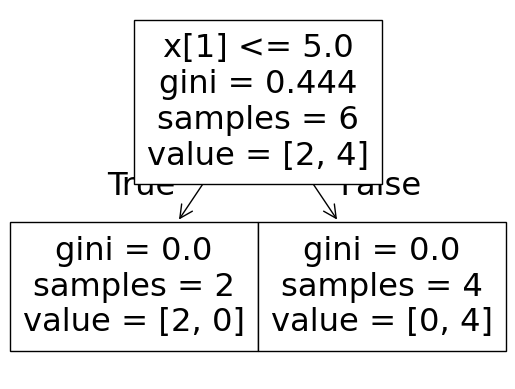

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


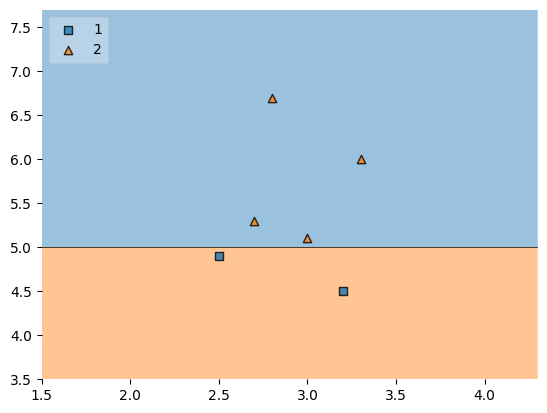

In [152]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [153]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
61,3.0,4.2,1
72,2.5,4.9,1
61,3.0,4.2,1
61,3.0,4.2,1
113,2.5,5.0,2
84,3.0,4.5,1
149,3.0,5.1,2
122,2.8,6.7,2


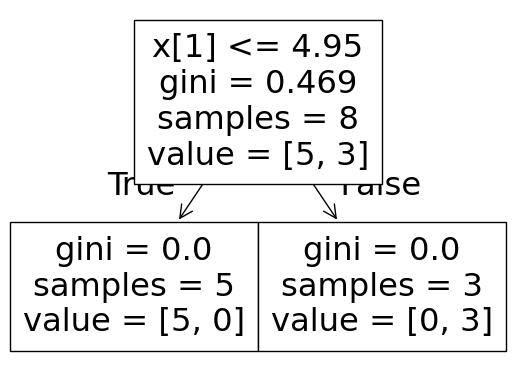

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


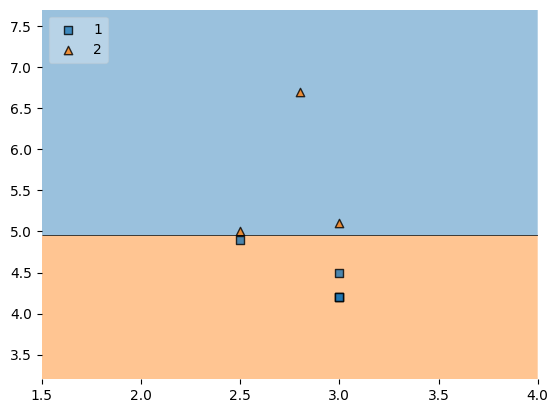

In [154]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [115]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [155]:
df_test

,sepal_width,petal_length,species
106,2.5,4.5,2
97,2.9,4.3,1
123,2.7,4.9,2
136,3.4,5.6,2
137,3.1,5.5,2


In [161]:
print("Predictor 1",dt_bag1.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.7,4.9]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [57]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
131,3.8,6.4,2
137,3.1,5.5,2
130,2.8,6.1,2
145,3.0,5.2,2
52,3.1,4.9,1
96,2.9,4.2,1
75,3.0,4.4,1
100,3.3,6.0,2
53,2.3,4.0,1


In [58]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
52,3.1,4.9,1
122,2.8,6.7,2
130,2.8,6.1,2
53,2.3,4.0,1
96,2.9,4.2,1
145,3.0,5.2,2
75,3.0,4.4,1


# Random Subspaces

In [60]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [66]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Species
134,2.6,Iris-virginica
12,3.0,Iris-setosa
13,3.0,Iris-setosa
146,2.5,Iris-virginica
38,3.0,Iris-setosa
62,2.2,Iris-versicolor
77,3.0,Iris-versicolor
45,3.0,Iris-setosa
109,3.6,Iris-virginica
10,3.7,Iris-setosa


# Random Patches

In [67]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [69]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
38,4.4,39
10,5.4,11
109,7.2,110
62,6.0,63
134,6.1,135
12,4.8,13
10,5.4,11
134,6.1,135
